In [8]:
# import requests
# import os

# # 모델의 raw URL을 사용합니다.
# url = 'https://github.com/NostalgicJ/Quantum_2023/raw/test/RNN_Practice/10/saved_models/NVspin_SimpleRNN_model.h5'
# response = requests.get(url, allow_redirects=True)

# # 현재 코드 파일이 위치한 디렉토리의 상위 디렉토리로 이동
# parent_directory = os.path.join(os.getcwd(), '..')

# # 상위 디렉토리에 새로운 디렉토리 생성
# new_directory = os.path.join(parent_directory, 'using_models')

# if not os.path.exists(new_directory):
#     os.makedirs(new_directory)

# # 모델 저장하기
# with open('../using_models/NVspin_SimpleRNN_model.h5', 'wb') as f:
#     f.write(response.content)
    

In [9]:
from tensorflow.keras.models import load_model

loaded_model = load_model('saved_models/NVspin_LSTM_model.h5')

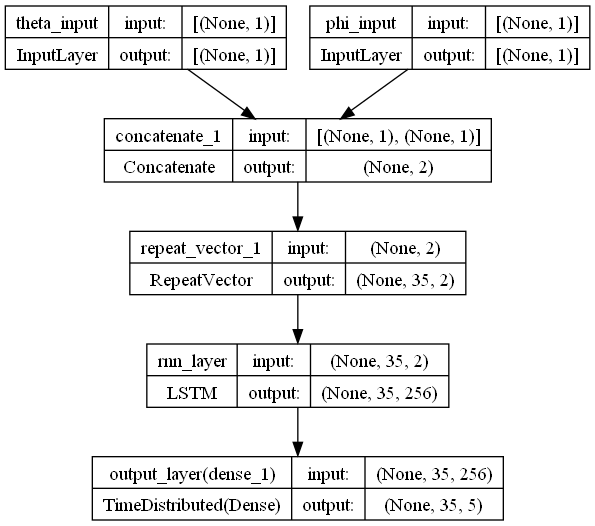

In [10]:
from tensorflow.keras.utils import plot_model
import os

# 저장할 디렉토리 생성
model_dir = 'model_plot'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# 원하는 디렉토리 지정
file_name = 'LSTM_model_plot.png'
full_path = os.path.join(model_dir, file_name)

# 모델 구조 시각화
plot_model(loaded_model, to_file=full_path, show_shapes=True, show_layer_names=True)


In [11]:
import numpy as np

# 새로운 theta와 phi 값 정의
new_theta = np.array([np.pi/2]).reshape(-1, 1)  # 예시 값
new_phi = np.array([np.pi]).reshape(-1, 1)    # 예시 값

# 모델로 예측
predicted_sequence = loaded_model.predict([new_theta, new_phi])

# 결과 출력 (예측값은 확률 분포로 나올 것이므로 가장 높은 확률을 가진 인덱스를 선택)
predicted_sequence_indices = np.argmax(predicted_sequence, axis=-1)
print(predicted_sequence_indices[0])

1/1 [==============================] - 0s 286ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 4 4 1 1 3 3 2 2 4 4 1 1 3 2 3]


In [12]:
import pandas as pd

# 깃허브에서 CSV 파일 다운로드
csv_url = "https://github.com/NostalgicJ/Quantum_2023/raw/test/Data/using/dt_2.6/ByAstar_dt_2.6_modified.csv"
df = pd.read_csv(csv_url)

shuffled_data = df.sample(frac=1).reset_index(drop=True)
shuffled_data.head()

,gate length,Theta,Phi,dt,combination,total time,computing time
0,33,2.929662,5.595665,2.6,"[4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, ...",85.8,111.285084
1,0,0.084689,0.055737,2.6,[],0.0,0.002025
2,26,2.439792,5.561737,2.6,"[4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, ...",67.6,252.000650
3,27,2.539521,2.653985,2.6,"[3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, ...",70.2,20.284366
4,27,2.661688,0.006324,2.6,"[4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, ...",70.2,243.598741


In [13]:
# 예측 수행
theta = shuffled_data['Theta'].values.reshape(-1, 1)
phi = shuffled_data['Phi'].values.reshape(-1, 1)
predictions = loaded_model.predict([theta, phi])

# 예측 결과를 원하는 형태로 가공 (예: 가장 확률이 높은 클래스를 선택하는 경우)
predicted_sequences = np.argmax(predictions, axis=-1)  # 이 부분은 예측 결과의 형태와 원하는 출력에 따라 조절이 필요합니다.

# 원본 DataFrame에 예측 결과를 추가
shuffled_data['Predicted'] = list(predicted_sequences)

540/540 [==============================] - 12s 21ms/step


In [14]:
import os

# 저장할 디렉토리 생성
result_dir = 'data_results'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# 결과를 CSV 파일로 해당 디렉토리에 저장
output_path = os.path.join(result_dir, "NVspin_LSTM_data_results.csv")
shuffled_data.to_csv(output_path, index=False)

print(f"File saved at: {output_path}")

File saved at: data_results\NVspin_LSTM_data_results.csv
